# Salt And Pepper Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## get inputs

In [2]:
# read input
image = Image.open('data/ForSalt.jpg').convert('LA')

In [3]:
# convert inputs
image_arr = np.asarray(image)
image_arr = image_arr[:,:,0]

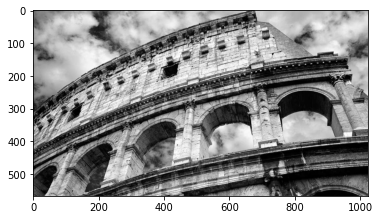

In [4]:
# show input
plt.imshow(image_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

## add salt and pepper

In [5]:
def add_salt_and_pepper(image_arr, noise_chance=5):
    flatten = image_arr.flatten()
    for i in range(flatten.size):
        if np.random.randint(100) < noise_chance:
            flatten[i] = np.random.randint(2) * 255
    return flatten.reshape(image_arr.shape)

In [6]:
image_with_noise = add_salt_and_pepper(image_arr, 10)

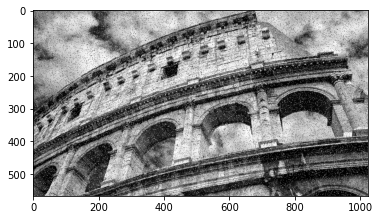

In [7]:
plt.imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
cv2.imwrite('result/SaltAndPepperNoise.png',image_with_noise)

True

## Median Filter

In [9]:
def apply_median_filter(image_arr, kernel):
    x_len, y_len = image_arr.shape
    result = np.zeros(image_arr.shape)
    half_kernel = kernel // 2
    for i in range(half_kernel, x_len - half_kernel):
        for j in range(half_kernel, y_len - half_kernel):
            image_part = image_arr[i-half_kernel: i+half_kernel + 1, j-half_kernel: j+half_kernel + 1]
            result[i, j] = np.median(image_part)
    return result

In [10]:
med_flt = apply_median_filter(image_with_noise, 3)

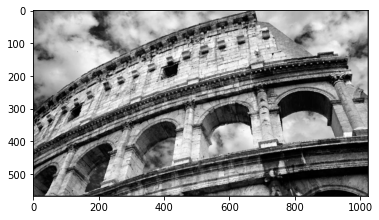

In [11]:
plt.imshow(med_flt, cmap='gray', vmin=0, vmax=255)
plt.show()

In [12]:
cv2.imwrite('result/MedianRes.png',med_flt)

True

## Gaussian Filter

In [13]:
def convolution(image_arr, kernel):
    kernel_x = kernel.shape[0]
    kernel_y = kernel.shape[1]
    kernel_flat = kernel.flatten()

    h = kernel_x // 2
    w = kernel_y // 2

    image_pad = np.pad(image_arr, pad_width=((h, h), (w, w)), mode='constant', constant_values=0).astype(np.float32)

    x_len = image_pad.shape[0]
    y_len = image_pad.shape[1]

    res = np.zeros(image_pad.shape)

    for i in range(h, x_len - h):
        for j in range(w, y_len - w):
            x = image_pad[i - h:i - h + kernel_x, j - w:j - w + kernel_y]
            x = x.flatten() * kernel_flat
            res[i][j] = x.sum()

    return res[h:-h, w:-w]

In [14]:
def gaussian_filter(sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gus_flt = np.zeros((filter_size, filter_size))
    n = filter_size // 2
    m = filter_size // 2
    for i in range(-n, n + 1):
        for j in range(-m, m + 1):
            x1 = 2 * np.pi * sigma ** 2
            x2 = np.exp(-(i ** 2 + j ** 2) / (2 * sigma ** 2))
            gus_flt[i + n, j + m] = (1 / x1) * x2
    return gus_flt

In [15]:
def apply_gaussian_filter(image_arr, sigma):
    gus_flt = gaussian_filter(sigma)
    result = convolution(image_arr, gus_flt)
    return result

In [16]:
gus_flt = apply_gaussian_filter(image_with_noise, 3)

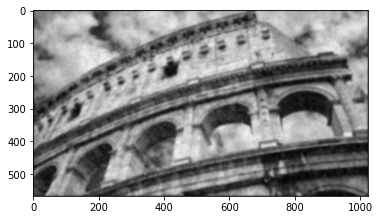

In [17]:
plt.imshow(gus_flt, cmap='gray', vmin=0, vmax=255)
plt.show()

In [18]:
cv2.imwrite('result/GaussianRes.png',gus_flt)

True